<a href="https://colab.research.google.com/github/alessandropequeno/PPGEEC-Deep-Learning-UFRN/blob/main/deep_questao3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3 QUESTÃO: Considere quatro distribuições gaussianas, C1, C2, C3, e C4, em um espaço de entrada de dimensionalidade igual a oito, isto é x = ( x1,x2,...,x8)^t. Todas as nuvens de dados formadas têm variâncias unitária, mas centros ou vetores média são diferentes e dados por m1 = (0,0,0,0,0,0,0,0)^t, m2 = (4,0,0,0,0,0,0,0)^t, m3 = (0,0,0,4,0,0,0,0)^t, m4 = (0,0,0,0,0,0,0,4)^t . Utilize uma rede de autoeconder para visualizar os dados em duas dimensões. O objetivo é visualizar os dados de dimensão 8 em um espaço de dimensão 2. Apresente os dados neste novo espaço.

### 1. IMPORTANDO AS BILIOTECAS

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

### 2. Gerar os dados seguindo as distribuições gaussianas fornecidas.

2.1. Definindo os Centros de Distribuições:
Os centros de distribuições, ou vetores média, representam os pontos centrais ao redor dos quais os dados são gerados. No contexto das distribuições gaussianas, esses centros determinam a localização central dos dados e são frequentemente usados ​​para gerar conjuntos de dados com características específicas.

2.2. Dados Gaussianos:
Uma distribuição gaussiana, também conhecida como distribuição normal, é uma das distribuições de probabilidade mais comuns na estatística. Ela é caracterizada por sua forma de sino e é completamente determinada por sua média e desvio padrão. Quando geramos dados gaussianos, estamos criando amostras aleatórias seguindo uma distribuição normal. Essas amostras tendem a se agrupar em torno da média, com a maioria dos pontos próximos à média e menos pontos mais distantes dela, de acordo com a curva de sino.

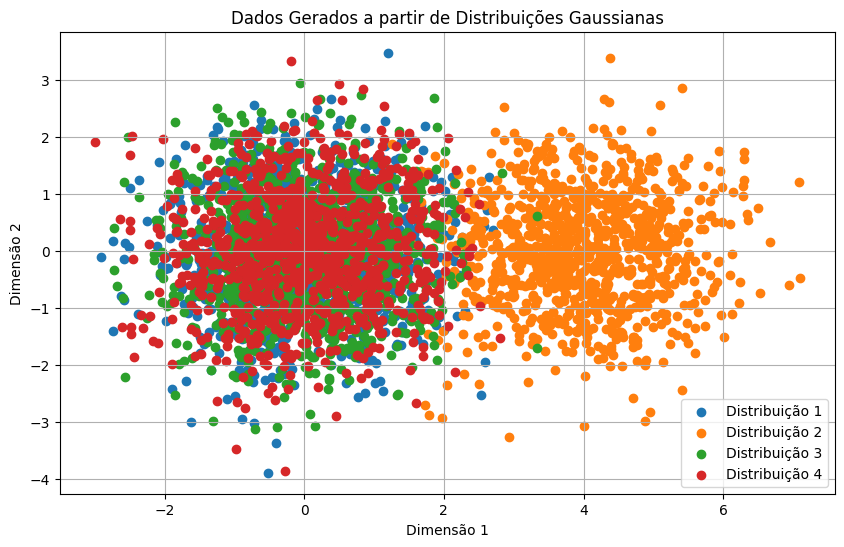

In [18]:
# Definir os centros das distribuições
m1 = np.array([0, 0, 0, 0, 0, 0, 0, 0])
m2 = np.array([4, 0, 0, 0, 0, 0, 0, 0])
m3 = np.array([0, 0, 0, 4, 0, 0, 0, 0])
m4 = np.array([0, 0, 0, 0, 0, 0, 0, 4])

# Gerar dados gaussianos
data1 = np.random.normal(m1, 1, size=(1000, 8))
data2 = np.random.normal(m2, 1, size=(1000, 8))
data3 = np.random.normal(m3, 1, size=(1000, 8))
data4 = np.random.normal(m4, 1, size=(1000, 8))

# Plotar os dados
plt.figure(figsize=(10, 6))
plt.scatter(data1[:, 0], data1[:, 1], label='Distribuição 1')
plt.scatter(data2[:, 0], data2[:, 1], label='Distribuição 2')
plt.scatter(data3[:, 0], data3[:, 1], label='Distribuição 3')
plt.scatter(data4[:, 0], data4[:, 1], label='Distribuição 4')
plt.title('Dados Gerados a partir de Distribuições Gaussianas')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.legend()
plt.grid(True)
plt.show()


### 3. Juntar os dados em um único conjunto

In [19]:
data = np.vstack([data1, data2, data3, data4])

### 4. Construir o autoencoder:

4.1. Ele consistirá em um codificador que reduz a dimensionalidade dos dados para 2.

In [20]:
input_dim = 8
encoding_dim = 2

# Encoder
encoder = models.Sequential([
    layers.Dense(6, activation='relu', input_shape=(input_dim,)),
    layers.Dense(encoding_dim, activation='relu')
])

# Decoder
decoder = models.Sequential([
    layers.Dense(6, activation='relu', input_shape=(encoding_dim,)),
    layers.Dense(input_dim, activation='sigmoid')
])

# Autoencoder
autoencoder = models.Sequential([encoder, decoder])

# Compilar o modelo
autoencoder.compile(optimizer='adam', loss='mse')

### 5. Treinar o autoencoder

In [21]:
autoencoder.fit(data, data, epochs=50, batch_size=64)

Epoch 1/50
63/63 [==============================] - 1s 2ms/step - loss: 2.2709
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 2.2022
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 2.1461
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 2.0997
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 2.0495
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 1.9833
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 1.9310
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 1.9012
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 1.8854
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 1.8740
Epoch 11/50
63/63 [==============================] - 0s 2ms/step - loss: 1.8648
Epoch 12/50
63/63 [==============================] - 0s 3ms/step - loss: 1.8572
Epoch 13/50
63/63 [==============================

### 6. Visualizar os dados reduzidos

6.1. Vamos usar o codificador para reduzir a dimensionalidade dos dados originais para 2 e, em seguida, plotar os dados neste novo espaço.

6.2. O autoencoder é uma arquitetura de rede neural que é usada para aprendizado não supervisionado de representações de dados. Ele consiste em duas partes principais: codificador e o decodificador.

CODIFICADOR: mapeia os dados de entrada para uma representação de dimensionalidade menor, conhecida como espaço latente ou espaço de características. O objetivo do codificador é aprender uma representação compacta dos dados que capture as características mais importantes. Isso é ralizado por meio de camadas de trasformação que reduzem a dimensionalidade dos dados.

DECODIFICADOR: mapeia a representação de dimensionalidade menor de volta para a dimensão original dos dados. O objetivo do decodificador é reconstruir os dados de entrada a partir da representação latente aprendida pelo codificador. Isso é feito por meio de camadas de transformação que aumenam a dimensionalidade dos dados de volta para a dimensão original.



125/125 [==============================] - 0s 2ms/step


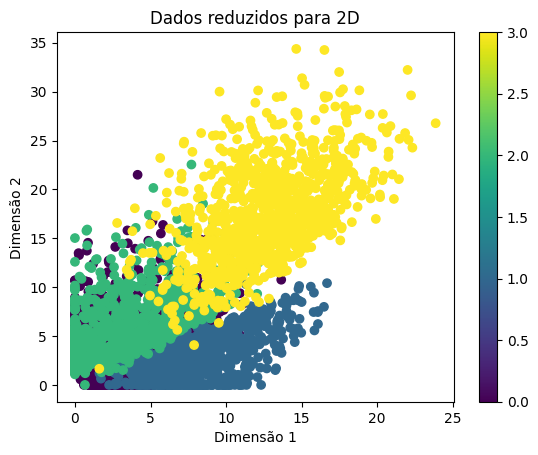

In [22]:
# Obter os dados reduzidos
encoded_data = encoder.predict(data)

# Plotar os dados reduzidos
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=np.hstack([[0]*1000, [1]*1000, [2]*1000, [3]*1000]), cmap='viridis')
plt.title('Dados reduzidos para 2D')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.colorbar()
plt.show()